# Introducing Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms. One of the best known is Scikit-Learn, a package that provides efficient versions of a large number of common algorithms. Once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

## Basics of the API
Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
- For supervised learning, often we predict labels for unknown data using the predict() method.
- For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [ ]:
# Data Representation in Scikit-Learn

# Get data as tables (df)

import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
10,5.4,3.7,1.5,0.2,setosa
80,5.5,2.4,3.8,1.1,versicolor
122,7.7,2.8,6.7,2.0,virginica
29,4.7,3.2,1.6,0.2,setosa


In [ ]:
# We'll extract the features matrix and target vector from the DF

X_iris = iris.drop('species', axis=1)
y_iris = iris.species

(150, 4)

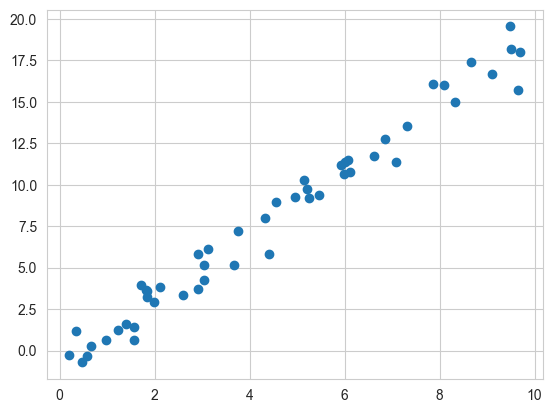

In [ ]:
# Supervised learning example: Simple linear regression

rng = np.random.RandomState(42)
x = 10*rng.rand(50) # uniformly distributed between 0 and 10 [0,1]
y = 2* x - 1 + rng.randn(50) # Linear equation 

plt.scatter(x, y)
plt.show()

In [ ]:
# 1. Choose a class of model

# Each model is represented by a Python class, so, we have to import each model like a different class

from sklearn.linear_model import LinearRegression

In [ ]:
# 2. Choose model hyperparameters

# Depending on the model class we are working with, we might need to answer one or more questions (instances)

model = LinearRegression(fit_intercept=True) # fit the intercept
model

# We have not yet applied the model to any data, we've just chosen the best model

LinearRegression()

In [ ]:
# 3. Arrange data into a features matrix and target vector

X = x.reshape(50,1)
X.shape

(50, 1)

In [ ]:
# 4. Fit the model to your data

# We can apply our model using fit()

model.fit(X,y)

LinearRegression()

In [ ]:
# In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores

print('The computed slope is: ',model.coef_)
print('The computed intercept is: ', model.intercept_)

# we see that they are very close to the input  slope of 2 and intercept of -1.


The computed slope is:  [1.9776566]
The computed intercept is:  -0.903310725531111


In [ ]:
# 5. Predict labels for unknown data

# Now, we want to evaluate it with new data. 
# We use the predict() method

xfit = np.linspace(-1,11).reshape(50,1)
yfit = model.predict(xfit)


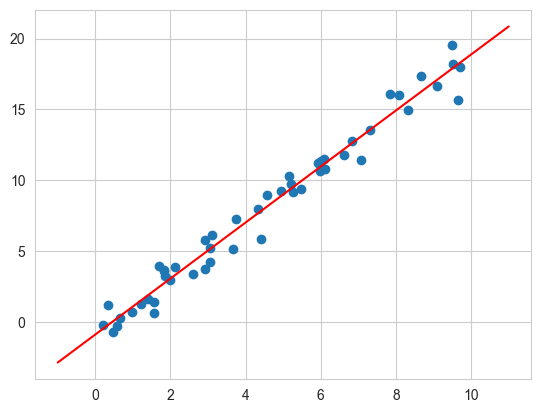

In [ ]:
plt.scatter(x,y)
plt.plot(xfit,yfit, color = 'red')
plt.show()

### Steps to apply supervised machine learning model

1. Choose a class of model
2. Choose model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data

Let's check a classification task in machine learning with the famous data called iris.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Holdout set

from sklearn.model_selection import train_test_split

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state= 0, train_size= 0.5)

In [ ]:
# Fit the model on one set of data

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X1, y1)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# evaluate the model on the second set of data

from sklearn.metrics import accuracy_score

y2_model = model.predict(X2)
print(y2_model == y2) # there are some falses

print(f'The accuary score is: {round(accuracy_score(y2, y2_model), 2)}')

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True False False False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
The accuary score is: 0.91


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris = sns.load_dataset('iris')
iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
97,6.2,2.9,4.3,1.3,versicolor
68,6.2,2.2,4.5,1.5,versicolor
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
# we'll assume that each class is drawn from an axis-aligned Gaussian distribution

X_iris = iris.drop('species', axis=1)
y_iris = iris.species

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state= 1)

In [ ]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain,ytrain)                   # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest,y_model)

0.9736842105263158

### Model validation via cross-validation

The first two pieces of this list requiere special treatment, because both of them help us to build the best model. That's why we need a way to validate our model and our hyperparameters, but how can we validate our model?

After choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the **training data** and comparing the prediction to the known value. 

> **Training** set and **validation** set have to handle different data. We need **holdout set**

One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. In the above case, half the dataset does not contribute to the training of the model! This is not optimal, and can cause problems – especially if the initial set of training data is small.

One way to address this is to use cross-validation; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.

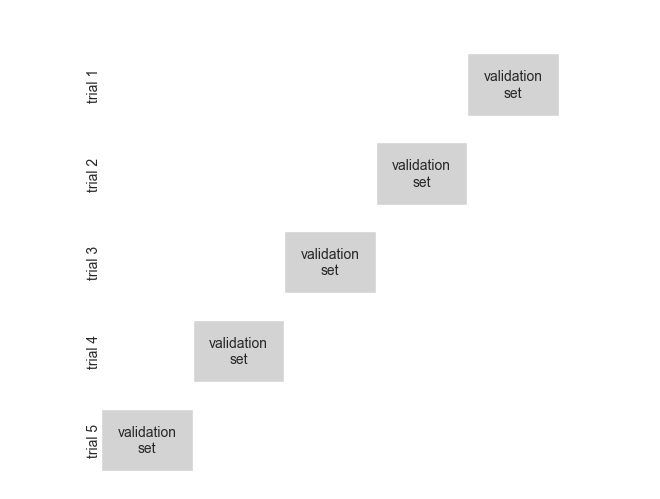

In [ ]:
def draw_rects(N, ax, textprop={}):
    for i in range(N):
        ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white'))
        ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightgray'))
        ax.text(5. * (i + 0.5) / N, i + 0.35,
                "validation\nset", ha='center', va='center', **textprop)
        ax.text(0, i + 0.35, "trial {0}".format(N - i),
                ha='right', va='center', rotation=90, **textprop)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-0.2, N + 0.2)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(5, ax, textprop=dict(size=10))

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(estimator= model, X= X, y = y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### Leave-one-out cross validation

we might wish to go to the extreme case in which our number of folds is equal to the number of data point: that is, we train on all points but one in each trial

In [ ]:
from sklearn.model_selection import LeaveOneOut, cross_val_score

loo = LeaveOneOut()
scores = cross_val_score(model, X, y, cv=loo)
scores


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# Taking the mean of these gives an estimate of the error rate

scores.mean()

0.96

### Selecting the Best Model

if our estimator is underperforming, how should we move forward? There are several possible answers:

1. Use a more complicated/more flexible model
2. Use a less complicated/less flexible model
3. Gather more training samples
4. Gather more data to add features to each sample

These issues are some of the most important aspects of the practice of machine learning.  

### The Bias-variance trade-off

The Bias-variance trade-off Fundamentally, the question of "the best model" is about finding a spot in the tradeoff between bias and variance.

From the scores associated with these two models, we can make an observation that holds more generally:

- For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
- For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

If we imagine that we have some ability to tune the model complexity, we would expect the training score and validation score to behave as illustrated in the following figure


In [ ]:
# Validation curves in Scikit-Learn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))


In [ ]:
# Now let's create some data to which we will fit our model:

import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

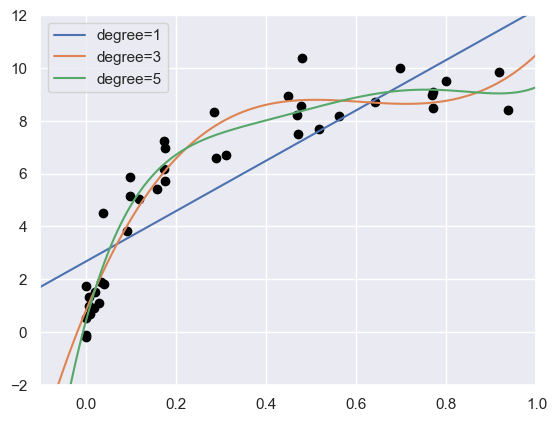

In [ ]:
# We can now visualize our data, along with polynomial fits of several degrees:

import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

# what degree of polynomial provides a suitable trade-off between bias (under-fitting) and variance (over-fitting)?

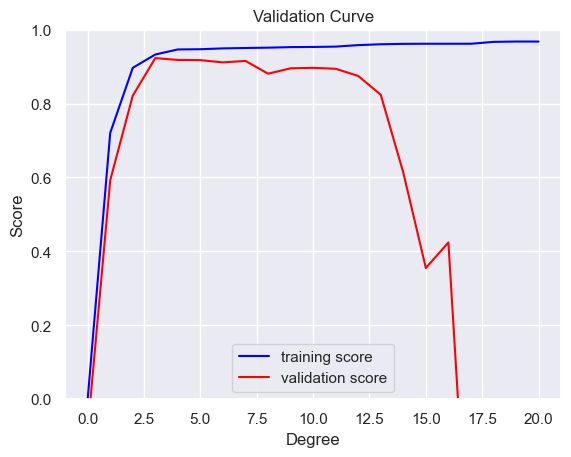

In [ ]:
from sklearn.model_selection import validation_curve
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de grados
degree = np.arange(0, 21)

# Realizar la curva de validación
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          param_name='polynomialfeatures__degree',
                                          param_range=degree, cv=7)

# Graficar los resultados
plt.plot(degree, np.median(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Validation Curve');

# From the validation curve, we can read-off that the optimal trade-off between bias and variance is found for a third-order polynomial

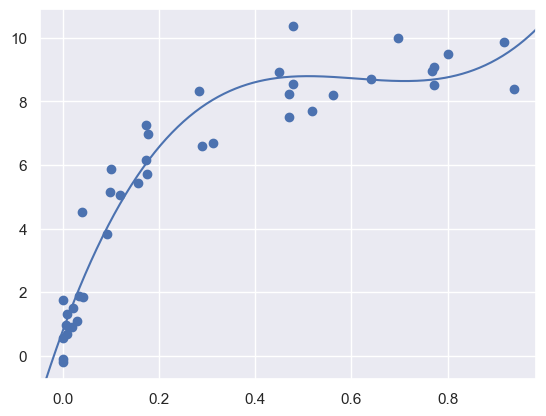

In [ ]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);